In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
import pandas as pd
from PIL import Image, ImageOps, ImageDraw
import glob
import numpy as np
import os
from sklearn import model_selection
from sklearn import metrics
import seaborn as sb
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
import pandas as pd
from PIL import Image, ImageOps, ImageDraw
import glob
import numpy as np
import os
from sklearn import model_selection
from sklearn import metrics
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
model_handle_map = {
  "efficientnetv2-s": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_s/classification/2",
  "efficientnetv2-m": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_m/classification/2",
  "efficientnetv2-l": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_l/classification/2",
  "efficientnetv2-s-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_s/classification/2",
  "efficientnetv2-m-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_m/classification/2",
  "efficientnetv2-l-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_l/classification/2",
  "efficientnetv2-xl-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_xl/classification/2",
  "efficientnetv2-b0-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b0/classification/2",
  "efficientnetv2-b1-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b1/classification/2",
  "efficientnetv2-b2-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b2/classification/2",
  "efficientnetv2-b3-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b3/classification/2",
  "efficientnetv2-s-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_s/classification/2",
  "efficientnetv2-m-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_m/classification/2",
  "efficientnetv2-l-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_l/classification/2",
  "efficientnetv2-xl-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_xl/classification/2",
  "efficientnetv2-b0-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b0/classification/2",
  "efficientnetv2-b1-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b1/classification/2",
  "efficientnetv2-b2-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b2/classification/2",
  "efficientnetv2-b3-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b3/classification/2",
  "efficientnetv2-b0": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/classification/2",
  "efficientnetv2-b1": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b1/classification/2",
  "efficientnetv2-b2": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b2/classification/2",
  "efficientnetv2-b3": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b3/classification/2",
  "efficientnet_b0": "https://tfhub.dev/tensorflow/efficientnet/b0/classification/1",
  "efficientnet_b1": "https://tfhub.dev/tensorflow/efficientnet/b1/classification/1",
  "efficientnet_b2": "https://tfhub.dev/tensorflow/efficientnet/b2/classification/1",
  "efficientnet_b3": "https://tfhub.dev/tensorflow/efficientnet/b3/classification/1",
  "efficientnet_b4": "https://tfhub.dev/tensorflow/efficientnet/b4/classification/1",
  "efficientnet_b5": "https://tfhub.dev/tensorflow/efficientnet/b5/classification/1",
  "efficientnet_b6": "https://tfhub.dev/tensorflow/efficientnet/b6/classification/1",
  "efficientnet_b7": "https://tfhub.dev/tensorflow/efficientnet/b7/classification/1",
  "bit_s-r50x1": "https://tfhub.dev/google/bit/s-r50x1/ilsvrc2012_classification/1",
  "inception_v3": "https://tfhub.dev/google/imagenet/inception_v3/classification/4",
  "inception_resnet_v2": "https://tfhub.dev/google/imagenet/inception_resnet_v2/classification/4",
  "resnet_v1_50": "https://tfhub.dev/google/imagenet/resnet_v1_50/classification/4",
  "resnet_v1_101": "https://tfhub.dev/google/imagenet/resnet_v1_101/classification/4",
  "resnet_v1_152": "https://tfhub.dev/google/imagenet/resnet_v1_152/classification/4",
  "resnet_v2_50": "https://tfhub.dev/google/imagenet/resnet_v2_50/classification/4",
  "resnet_v2_101": "https://tfhub.dev/google/imagenet/resnet_v2_101/classification/4",
  "resnet_v2_152": "https://tfhub.dev/google/imagenet/resnet_v2_152/classification/4",
  "nasnet_large": "https://tfhub.dev/google/imagenet/nasnet_large/classification/4",
  "nasnet_mobile": "https://tfhub.dev/google/imagenet/nasnet_mobile/classification/4",
  "pnasnet_large": "https://tfhub.dev/google/imagenet/pnasnet_large/classification/4",
  "mobilenet_v2_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/classification/4",
  "mobilenet_v2_130_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4",
  "mobilenet_v2_140_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/classification/4",
  "mobilenet_v3_small_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/classification/5",
  "mobilenet_v3_small_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_075_224/classification/5",
  "mobilenet_v3_large_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/classification/5",
  "mobilenet_v3_large_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_075_224/classification/5",
}

model_image_size_map = {
  "efficientnetv2-s": 384,
  "efficientnetv2-m": 480,
  "efficientnetv2-l": 480,
  "efficientnetv2-b0": 224,
  "efficientnetv2-b1": 240,
  "efficientnetv2-b2": 260,
  "efficientnetv2-b3": 300,
  "efficientnetv2-s-21k": 384,
  "efficientnetv2-m-21k": 480,
  "efficientnetv2-l-21k": 480,
  "efficientnetv2-xl-21k": 512,
  "efficientnetv2-b0-21k": 224,
  "efficientnetv2-b1-21k": 240,
  "efficientnetv2-b2-21k": 260,
  "efficientnetv2-b3-21k": 300,
  "efficientnetv2-s-21k-ft1k": 384,
  "efficientnetv2-m-21k-ft1k": 480,
  "efficientnetv2-l-21k-ft1k": 480,
  "efficientnetv2-xl-21k-ft1k": 512,
  "efficientnetv2-b0-21k-ft1k": 224,
  "efficientnetv2-b1-21k-ft1k": 240,
  "efficientnetv2-b2-21k-ft1k": 260,
  "efficientnetv2-b3-21k-ft1k": 300, 
  "efficientnet_b0": 224,
  "efficientnet_b1": 240,
  "efficientnet_b2": 260,
  "efficientnet_b3": 300,
  "efficientnet_b4": 380,
  "efficientnet_b5": 456,
  "efficientnet_b6": 528,
  "efficientnet_b7": 600,
  "inception_v3": 299,
  "inception_resnet_v2": 299,
  "mobilenet_v2_100_224": 224,
  "mobilenet_v2_130_224": 224,
  "mobilenet_v2_140_224": 224,
  "nasnet_large": 331,
  "nasnet_mobile": 224,
  "pnasnet_large": 331,
  "resnet_v1_50": 224,
  "resnet_v1_101": 224,
  "resnet_v1_152": 224,
  "resnet_v2_50": 224,
  "resnet_v2_101": 224,
  "resnet_v2_152": 224,
  "mobilenet_v3_small_100_224": 224,
  "mobilenet_v3_small_075_224": 224,
  "mobilenet_v3_large_100_224": 224,
  "mobilenet_v3_large_075_224": 224,
}

# Experiment 1

In [12]:
def generate_vertical_vernier(shape, imname, color="white"):
    w, h = shape
    img = Image.new("RGB", (w, h))
    img1 = ImageDraw.Draw(img)

    # line 1
    line1w1 = np.random.randint(0, w)
    line1w2 = line1w1
    line1h1 = 0
    line1h2 = h//2
    #print(line1w, line1h)
    img1.line([(line1w1, line1h1), (line1w2, line1h2)], fill=color, width=0)

    # line 2
    if np.random.randint(0, 2)==0:
      line2w1 = np.random.randint(int(line1w2 - 0.01*w), int(line1w2 + 0.01*w))
    else:
      line2w1 = line1w2
    if line2w1<0:
        line2w1 = 0
    if line2w1>=w:
        line2w1 = w - 1
    line2w2 = line2w1
    line2h1 = h//2
    line2h2 = h
    img1.line([(line2w1, line2h1), (line2w2, line2h2)], fill = color, width = 0)
    img.save(imname)

    if line1w1!=line2w1:
      return 'different'
    return 'same'
    #if line1w1<line2w1:
    #    return "left"
    #elif line1w1>line2w1:
    #    return "right"
    #return "same"

In [13]:
def generate_horizontal_vernier(shape, imname, color="white"):
    w, h = shape
    img = Image.new("RGB", (w, h))
    img1 = ImageDraw.Draw(img)

    # line 1
    line1w1 = 0
    line1w2 = w//2
    line1h1 = np.random.randint(0, h)
    line1h2 = line1h1
    img1.line([(line1w1, line1h1), (line1w2, line1h2)], fill=color, width=0)

    # line 2
    line2w1 = w//2
    line2w2 = w
    if np.random.randint(0, 2)==0:
      line2h1 = np.random.randint(int(line1h2 - 0.05*h), int(line1h2 + 0.05*h))
    else:
      line2h1 = line1h2
    if line2h1<0:
        line2h1 = 0
    if line2h1>=h:
        line2h1 = h - 1
    line2h2 = line2h1
    img1.line([(line2w1, line2h1), (line2w2, line2h2)], fill = color, width = 0)
    img.save(imname)

    if line1h1!=line2h1:
      return 'different'
    return 'same'
    #if line1h1<line2h1:
    #    return "up"
    #elif line1h1>line2h1:
    #    return "down"
    #return "same"

In [14]:
def generate_random_verniers(shape, type, dirname, n=200):
    if not os.path.exists(dirname):
        os.makedirs(dirname)
    files = glob.glob(dirname+"/*")
    for f in files:
      os.remove(f)
    f = open(dirname+"/labels.txt", "w")
    
    if type=='vertical':
        for i in range(n):
            imname = dirname + "/img" + str(i) + ".jpg"
            label = generate_vertical_vernier(shape, imname)
            f.write(label+"\n")
    
    elif type == 'horizontal':
        for i in range(n):
            imname = dirname + "/img" + str(i) + ".jpg"
            label = generate_horizontal_vernier(shape, imname)
            f.write(label+"\n")
    
    else:
        for i in range(n):
            imname = dirname + "/img" + str(i) + ".jpg"
            if np.random.randint(0, 2) == 0:
                label = generate_vertical_vernier(shape, imname)
            else:
                label = generate_horizontal_vernier(shape, imname)
            f.write(label+"\n")
    
    f.close()

In [15]:
def test_for_vertical_vernier(model_name, numhorsamples, numversamples):
  model_handle = model_handle_map[model_name]
  image_size = model_image_size_map[model_name]
  hdirname = "/content/drive/My Drive/Colab Notebooks/Cog Sci and AI/csai project/horizontalvernier"
  generate_random_verniers((image_size, image_size), 'horizontal', hdirname, numhorsamples)
  with open(hdirname + "/labels.txt", 'r') as f:
    hlabels = f.readlines()
    hclasses = [l.strip() for l in hlabels]
    for i in range(len(hclasses)):
      hclasses[i] = 0 if hclasses[i]=='same' else 1
    hclasses = np.array(hclasses)
  num_classes = len(np.unique(hclasses))

  himgs = []
  himgfiles = glob.glob(hdirname+"/*.jpg")
  for imgfile in himgfiles:
    img = np.asarray(
        Image.open(imgfile)
    )
    img = tf.convert_to_tensor(img, dtype=tf.float32)
    img = img/255.0
    himgs.append(img)
  himgs = np.array(himgs)
  
  trainx, testx, trainy, testy = model_selection.train_test_split(
      himgs, hclasses, test_size = 0.3
  )

  classifier = keras.Sequential([
                               hub.KerasLayer(model_handle),
                               keras.layers.Dense(num_classes, activation='softmax')
                              ])

  classifier.compile(
      optimizer = keras.optimizers.Adam(),
      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
      metrics=['acc']
  )

  # generate vertical verniers for testing
  vdirname = "/content/drive/My Drive/Colab Notebooks/Cog Sci and AI/csai project/verticalvernier"
  generate_random_verniers((image_size, image_size), 'vertical', vdirname, numversamples)

  with open(vdirname + "/labels.txt", 'r') as f:
    vlabels = f.readlines()
    vclasses = [l.strip() for l in vlabels]
    for i in range(len(vclasses)):
      vclasses[i] = 0 if vclasses[i]=='same' else 1
    vclasses = np.array(vclasses)
  vnum_classes = len(np.unique(vclasses))

  vimgs = []
  vimgfiles = glob.glob(vdirname+"/*.jpg")
  for imgfile in vimgfiles:
    img = np.asarray(
        Image.open(imgfile)
    )
    img = tf.convert_to_tensor(img, dtype=tf.float32)
    img = img/255.0
    vimgs.append(img)
  vimgs = np.array(vimgs)

  #print(classifier.predict(testx))
  plt.figure()
  print(f"Accuracy of random model on horizontal verniers: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(testx), axis=1), testy, normalize='true'),
          index=['Same', 'Different'],
          columns=['Same', 'Different']
      ), 
  annot=True)
  
  plt.figure()
  print(f"Accuracy of random model on vertical verniers: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(vimgs), axis=1), vclasses, normalize='true'),
          index=['Same', 'Different'],
          columns=['Same', 'Different']
      ), 
  annot=True)
  

  classifier.fit(
      trainx, trainy, epochs=10, verbose = 0
  )

  plt.figure()
  print(f"Accuracy of horizontally trained model on horizontal verniers: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(testx), axis=1), testy, normalize='true'),
          index=['Same', 'Different'],
          columns=['Same', 'Different']
      ), 
      annot=True
  )
  
  plt.figure()
  print(f"Accuracy of horizontally trained model on vertical vernier: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(vimgs), axis=1), vclasses, normalize='true'),
          index=['Same', 'Different'],
          columns=['Same', 'Different']
      ),
      annot=True
  )
  

Accuracy of random model on horizontal verniers: 
Accuracy of random model on vertical verniers: 
Accuracy of horizontally trained model on horizontal verniers: 
Accuracy of horizontally trained model on vertical vernier: 


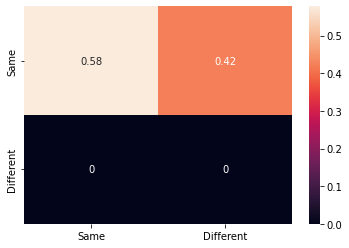

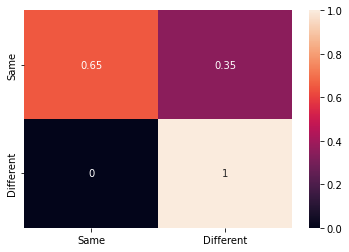

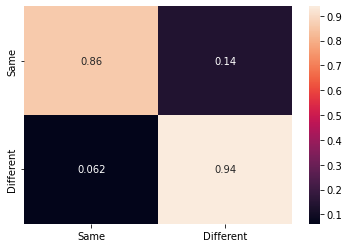

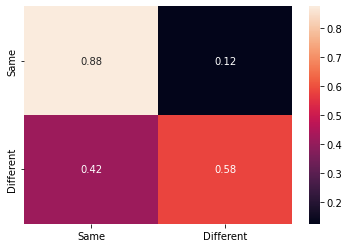

In [18]:
test_for_vertical_vernier("resnet_v2_152", 300, 100)

In [ ]:
def test_for_vertical_vernier_pt(model_name, numhorsamples, numversamples):
  model_handle = model_handle_map[model_name]
  image_size = model_image_size_map[model_name]
  hdirname = "/content/drive/My Drive/Colab Notebooks/Cog Sci and AI/csai project/horizontalvernier"
  generate_random_verniers((image_size, image_size), 'horizontal', hdirname, numhorsamples)
  with open(hdirname + "/labels.txt", 'r') as f:
    hlabels = f.readlines()
    hclasses = [l.strip() for l in hlabels]
    for i in range(len(hclasses)):
      hclasses[i] = 0 if hclasses[i]=='same' else 1
    hclasses = np.array(hclasses)
  num_classes = len(np.unique(hclasses))

  himgs = []
  himgfiles = glob.glob(hdirname+"/*.jpg")
  for imgfile in himgfiles:
    img = np.asarray(
        Image.open(imgfile)
    )
    img = tf.convert_to_tensor(img, dtype=tf.float32)
    img = img/255.0
    himgs.append(img)
  himgs = np.array(himgs)
  
  trainx, testx, trainy, testy = model_selection.train_test_split(
      himgs, hclasses, test_size = 0.3
  )

  classifier = keras.Sequential([
                               hub.KerasLayer(model_handle, trainable=False),
                               keras.layers.Dense(num_classes, activation='softmax')
                              ])

  classifier.compile(
      optimizer = keras.optimizers.Adam(),
      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
      metrics=['acc']
  )

  # generate vertical verniers for testing
  vdirname = "/content/drive/My Drive/Colab Notebooks/Cog Sci and AI/csai project/verticalvernier"
  generate_random_verniers((image_size, image_size), 'vertical', vdirname, numversamples)

  with open(vdirname + "/labels.txt", 'r') as f:
    vlabels = f.readlines()
    vclasses = [l.strip() for l in vlabels]
    for i in range(len(vclasses)):
      vclasses[i] = 0 if vclasses[i]=='same' else 1
    vclasses = np.array(vclasses)
  vnum_classes = len(np.unique(vclasses))

  vimgs = []
  vimgfiles = glob.glob(vdirname+"/*.jpg")
  for imgfile in vimgfiles:
    img = np.asarray(
        Image.open(imgfile)
    )
    img = tf.convert_to_tensor(img, dtype=tf.float32)
    img = img/255.0
    vimgs.append(img)
  vimgs = np.array(vimgs)

  #print(classifier.predict(testx))
  plt.figure()
  print(f"Accuracy of random model on horizontal verniers: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(testx), axis=1), testy, normalize='true'),
          index=['Same', 'Different'],
          columns=['Same', 'Different']
      ), 
  annot=True)
  
  plt.figure()
  print(f"Accuracy of random model on vertical verniers: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(vimgs), axis=1), vclasses, normalize='true'),
          index=['Same', 'Different'],
          columns=['Same', 'Different']
      ), 
  annot=True)
  

  classifier.fit(
      trainx, trainy, epochs=10, verbose = 0
  )

  plt.figure()
  print(f"Accuracy of horizontally trained model on horizontal verniers: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(testx), axis=1), testy, normalize='true'),
          index=['Same', 'Different'],
          columns=['Same', 'Different']
      ), 
      annot=True
  )
  
  plt.figure()
  print(f"Accuracy of horizontally trained model on vertical vernier: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(vimgs), axis=1), vclasses, normalize='true'),
          index=['Same', 'Different'],
          columns=['Same', 'Different']
      ),
      annot=True
  )
  

Accuracy of random model on horizontal verniers: 
Accuracy of random model on vertical verniers: 
Accuracy of horizontally trained model on horizontal verniers: 
Accuracy of horizontally trained model on vertical vernier: 


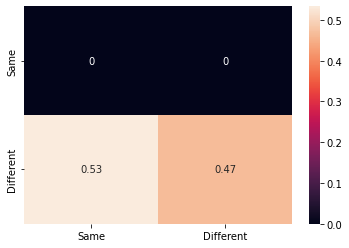

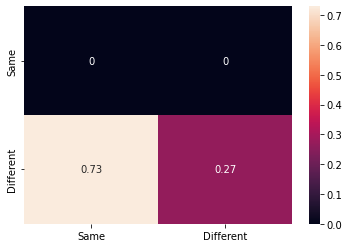

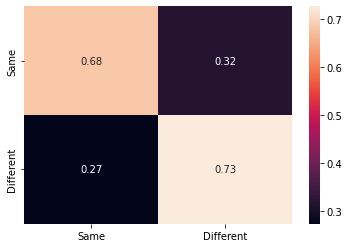

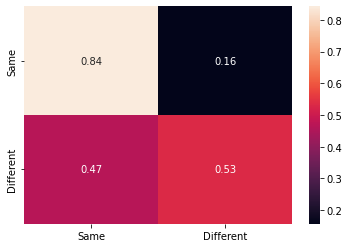

In [ ]:
test_for_vertical_vernier_pt("resnet_v2_152", 300, 100)

# Experiment 2

Accuracy of random model on vertical verniers: 
Accuracy of random model on horizontal verniers: 
Accuracy of vertically trained model on vertical verniers: 
Accuracy of vertically trained model on horizontal vernier: 


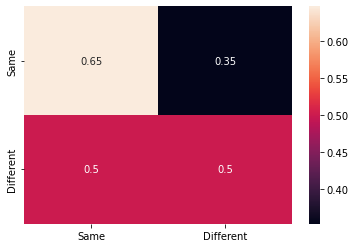

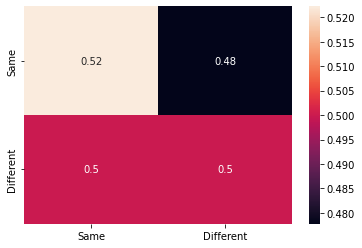

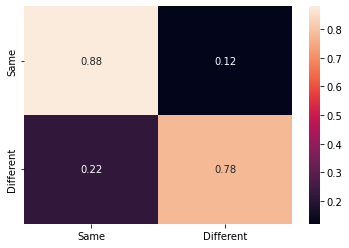

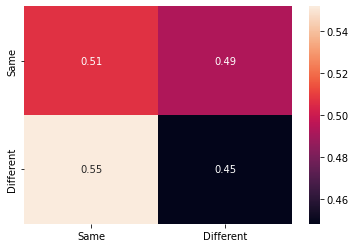

In [ ]:
def test_horizontal_vernier(model_name, numhorsamples, numversamples):
  model_handle = model_handle_map[model_name]
  image_size = model_image_size_map[model_name]
  vdirname = "/content/drive/My Drive/Colab Notebooks/Cog Sci and AI/csai project/verticalvernier"
  generate_random_verniers((image_size, image_size), 'vertical', vdirname, numversamples)
  with open(vdirname + "/labels.txt", 'r') as f:
    vlabels = f.readlines()
    vclasses = [l.strip() for l in vlabels]
    for i in range(len(vclasses)):
      vclasses[i] = 0 if vclasses[i]=='same' else 1
    vclasses = np.array(vclasses)
  num_classes = len(np.unique(vclasses))

  vimgs = []
  vimgfiles = glob.glob(vdirname+"/*.jpg")
  for imgfile in vimgfiles:
    img = np.asarray(
        Image.open(imgfile)
    )
    img = tf.convert_to_tensor(img, dtype=tf.float32)
    img = img/255.0
    vimgs.append(img)
  vimgs = np.array(vimgs)
  
  trainx, testx, trainy, testy = model_selection.train_test_split(
      vimgs, vclasses, test_size = 0.3
  )

  classifier = keras.Sequential([
                               hub.KerasLayer(model_handle),
                               keras.layers.Dense(num_classes, activation='softmax')
                              ])

  classifier.compile(
      optimizer = keras.optimizers.Adam(),
      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
      metrics=['acc']
  )

  # generate horizontal verniers for testing
  hdirname = "/content/drive/My Drive/Colab Notebooks/Cog Sci and AI/csai project/horizontalvernier"
  generate_random_verniers((image_size, image_size), 'horizontal', hdirname, numhorsamples)

  with open(hdirname + "/labels.txt", 'r') as f:
    hlabels = f.readlines()
    hclasses = [l.strip() for l in hlabels]
    for i in range(len(hclasses)):
      hclasses[i] = 0 if hclasses[i]=='same' else 1
    hclasses = np.array(hclasses)
  hnum_classes = len(np.unique(hclasses))

  himgs = []
  himgfiles = glob.glob(hdirname+"/*.jpg")
  for imgfile in himgfiles:
    img = np.asarray(
        Image.open(imgfile)
    )
    img = tf.convert_to_tensor(img, dtype=tf.float32)
    img = img/255.0
    himgs.append(img)
  himgs = np.array(himgs)

  plt.figure()
  print(f"Accuracy of random model on vertical verniers: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(testx), axis=1), testy, normalize='true'),
          index=['Same', 'Different'],
          columns=['Same', 'Different']
      ), 
      annot=True
  )
  plt.figure()
  print(f"Accuracy of random model on horizontal verniers: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(himgs), axis=1), hclasses, normalize='true'),
          index=['Same', 'Different'],
          columns=['Same', 'Different']
      ), 
      annot=True
  )

  classifier.fit(
      trainx, trainy, epochs=10, verbose = 0
  )

  plt.figure()
  print(f"Accuracy of vertically trained model on vertical verniers: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(testx), axis=1), testy, normalize='true'),
          index=['Same', 'Different'],
          columns=['Same', 'Different']
      ), 
      annot=True
  )
  plt.figure()
  print(f"Accuracy of vertically trained model on horizontal vernier: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(himgs), axis=1), hclasses, normalize='true'),
          index=['Same', 'Different'],
          columns=['Same', 'Different']
      ), 
      annot=True
  )

test_horizontal_vernier('resnet_v2_152', 100, 300)

Accuracy of random model on vertical verniers: 
Accuracy of random model on horizontal verniers: 
Accuracy of vertically trained model on vertical verniers: 
Accuracy of vertically trained model on horizontal vernier: 


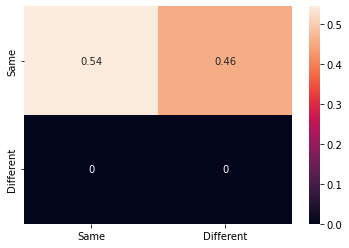

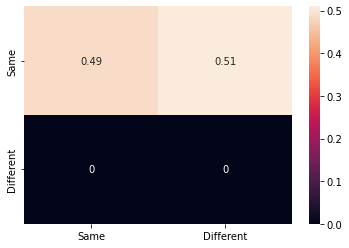

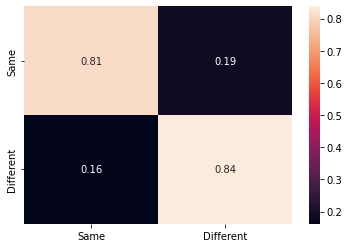

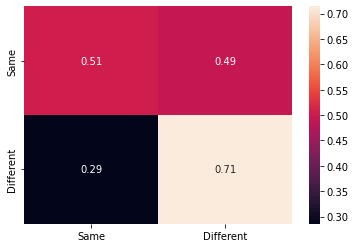

In [ ]:
def test_horizontal_vernier_pt(model_name, numhorsamples, numversamples):
  model_handle = model_handle_map[model_name]
  image_size = model_image_size_map[model_name]
  vdirname = "/content/drive/My Drive/Colab Notebooks/Cog Sci and AI/csai project/verticalvernier"
  generate_random_verniers((image_size, image_size), 'vertical', vdirname, numversamples)
  with open(vdirname + "/labels.txt", 'r') as f:
    vlabels = f.readlines()
    vclasses = [l.strip() for l in vlabels]
    for i in range(len(vclasses)):
      vclasses[i] = 0 if vclasses[i]=='same' else 1
    vclasses = np.array(vclasses)
  num_classes = len(np.unique(vclasses))

  vimgs = []
  vimgfiles = glob.glob(vdirname+"/*.jpg")
  for imgfile in vimgfiles:
    img = np.asarray(
        Image.open(imgfile)
    )
    img = tf.convert_to_tensor(img, dtype=tf.float32)
    img = img/255.0
    vimgs.append(img)
  vimgs = np.array(vimgs)
  
  trainx, testx, trainy, testy = model_selection.train_test_split(
      vimgs, vclasses, test_size = 0.3
  )

  classifier = keras.Sequential([
                               hub.KerasLayer(model_handle, trainable=False),
                               keras.layers.Dense(num_classes, activation='softmax')
                              ])

  classifier.compile(
      optimizer = keras.optimizers.Adam(),
      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
      metrics=['acc']
  )

  # generate horizontal verniers for testing
  hdirname = "/content/drive/My Drive/Colab Notebooks/Cog Sci and AI/csai project/horizontalvernier"
  generate_random_verniers((image_size, image_size), 'horizontal', hdirname, numhorsamples)

  with open(hdirname + "/labels.txt", 'r') as f:
    hlabels = f.readlines()
    hclasses = [l.strip() for l in hlabels]
    for i in range(len(hclasses)):
      hclasses[i] = 0 if hclasses[i]=='same' else 1
    hclasses = np.array(hclasses)
  hnum_classes = len(np.unique(hclasses))

  himgs = []
  himgfiles = glob.glob(hdirname+"/*.jpg")
  for imgfile in himgfiles:
    img = np.asarray(
        Image.open(imgfile)
    )
    img = tf.convert_to_tensor(img, dtype=tf.float32)
    img = img/255.0
    himgs.append(img)
  himgs = np.array(himgs)

  plt.figure()
  print(f"Accuracy of random model on vertical verniers: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(testx), axis=1), testy, normalize='true'),
          index=['Same', 'Different'],
          columns=['Same', 'Different']
      ), 
      annot=True
  )
  plt.figure()
  print(f"Accuracy of random model on horizontal verniers: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(himgs), axis=1), hclasses, normalize='true'),
          index=['Same', 'Different'],
          columns=['Same', 'Different']
      ), 
      annot=True
  )

  classifier.fit(
      trainx, trainy, epochs=10, verbose = 0
  )

  plt.figure()
  print(f"Accuracy of vertically trained model on vertical verniers: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(testx), axis=1), testy, normalize='true'),
          index=['Same', 'Different'],
          columns=['Same', 'Different']
      ), 
      annot=True
  )
  plt.figure()
  print(f"Accuracy of vertically trained model on horizontal vernier: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(himgs), axis=1), hclasses, normalize='true'),
          index=['Same', 'Different'],
          columns=['Same', 'Different']
      ), 
      annot=True
  )

test_horizontal_vernier_pt('resnet_v2_152', 100, 300)

# Experiment 3

Random model performance on 3 points: 
Trained model performance on 3 points: 


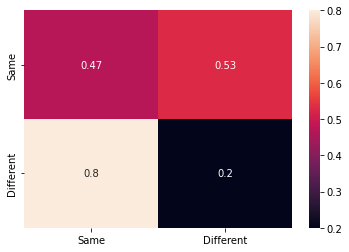

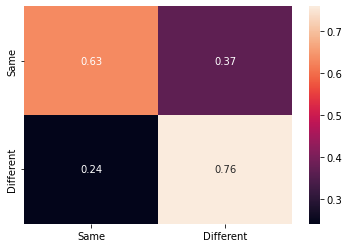

In [ ]:
def test_for_3points(model_name, n, rad=2):
  model_handle = model_handle_map[model_name]
  image_size = model_image_size_map[model_name]
  w = h = image_size

  imgs = []
  labels = []
  classes = []
  
  for i in range(n):
    img = Image.new("RGB", (w, h))
    img1 = ImageDraw.Draw(img)
    # point 1
    p1h = np.random.randint(0, h//2)
    p1w = np.random.randint(0, w)
    img1.ellipse([(p1w - rad, p1h - rad), (p1w + rad, p1h + rad)],
        fill='white'
    )

    # point 2
    if np.random.randint(0, 2)==0: # same
      p2h = h//2
      p2w = p1w
      labels.append('same')
      classes.append(0)
    else: # different
      p2h = h//2
      p2w = np.random.randint(int(p1w - 0.1*w), int(p1w + 0.1*w))
      labels.append('different')
      classes.append(1)
    img1.ellipse(
        [(p2w - rad, p2h - rad), (p2w + rad, p2h + rad)],
        fill='white'
    )

    # point 3
    p3h = np.random.randint(h//2, h - rad)
    p3w = p1w
    img1.ellipse(
        [(p3w - rad, p3h - rad), (p3w + rad, p3h + rad)],
        fill='white'
    )

    img = np.asarray(img)
    img = tf.convert_to_tensor(img, dtype=tf.float32)
    img = img/255.0
    imgs.append(img)
  
  imgs = np.array(imgs)
  classes = np.array(classes)
  trainx, testx, trainy, testy = model_selection.train_test_split(
      imgs, classes, test_size = 0.3
  )

  num_classes = 2
  classifier = keras.Sequential([
                               hub.KerasLayer(model_handle),
                               keras.layers.Dense(num_classes, activation='softmax')
                              ])
  classifier.compile(
      optimizer = keras.optimizers.Adam(),
      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
      metrics=['acc']
  )

  plt.figure()
  print(f"Random model performance on 3 points: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(testx), axis=1), testy, normalize='true'),
          index=['Same', 'Different'],
          columns=['Same', 'Different']
  ), annot=True)

  classifier.fit(
      trainx, trainy, epochs=10, verbose = 0
  )

  plt.figure()
  print(f"Trained model performance on 3 points: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(testx), axis=1), testy, normalize='true'),
          index=['Same', 'Different'],
          columns=['Same', 'Different']
  ), annot=True)

test_for_3points('resnet_v2_152', 300)

Random model performance on 3 points: 
Trained model performance on 3 points: 


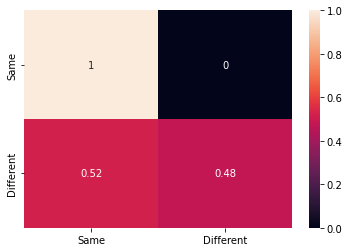

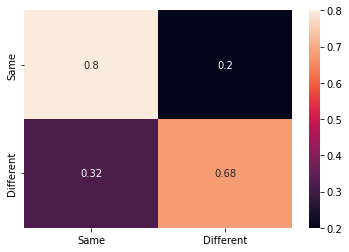

In [ ]:
def test_for_3points_pt(model_name, n, rad=2):
  model_handle = model_handle_map[model_name]
  image_size = model_image_size_map[model_name]
  w = h = image_size

  imgs = []
  labels = []
  classes = []
  
  for i in range(n):
    img = Image.new("RGB", (w, h))
    img1 = ImageDraw.Draw(img)
    # point 1
    p1h = np.random.randint(0, h//2)
    p1w = np.random.randint(0, w)
    img1.ellipse([(p1w - rad, p1h - rad), (p1w + rad, p1h + rad)],
        fill='white'
    )

    # point 2
    if np.random.randint(0, 2)==0: # same
      p2h = h//2
      p2w = p1w
      labels.append('same')
      classes.append(0)
    else: # different
      p2h = h//2
      p2w = np.random.randint(int(p1w - 0.1*w), int(p1w + 0.1*w))
      labels.append('different')
      classes.append(1)
    img1.ellipse(
        [(p2w - rad, p2h - rad), (p2w + rad, p2h + rad)],
        fill='white'
    )

    # point 3
    p3h = np.random.randint(h//2, h - rad)
    p3w = p1w
    img1.ellipse(
        [(p3w - rad, p3h - rad), (p3w + rad, p3h + rad)],
        fill='white'
    )

    img = np.asarray(img)
    img = tf.convert_to_tensor(img, dtype=tf.float32)
    img = img/255.0
    imgs.append(img)
  
  imgs = np.array(imgs)
  classes = np.array(classes)
  trainx, testx, trainy, testy = model_selection.train_test_split(
      imgs, classes, test_size = 0.3
  )

  num_classes = 2
  classifier = keras.Sequential([
                               hub.KerasLayer(model_handle, trainable=False),
                               keras.layers.Dense(num_classes, activation='softmax')
                              ])
  classifier.compile(
      optimizer = keras.optimizers.Adam(),
      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
      metrics=['acc']
  )

  plt.figure()
  print(f"Random model performance on 3 points: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(testx), axis=1), testy, normalize='true'),
          index=['Same', 'Different'],
          columns=['Same', 'Different']
  ), annot=True)

  classifier.fit(
      trainx, trainy, epochs=10, verbose = 0
  )

  plt.figure()
  print(f"Trained model performance on 3 points: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(testx), axis=1), testy, normalize='true'),
          index=['Same', 'Different'],
          columns=['Same', 'Different']
  ), annot=True)

test_for_3points_pt('resnet_v2_152', 300)

# Experiment 4

In [ ]:
def test_for_3points_left_trained(model_name, n, rn, rad=2):
  model_handle = model_handle_map[model_name]
  image_size = model_image_size_map[model_name]
  w = h = image_size

  limgs = []
  llabels = []
  lclasses = []
  
  for i in range(n):
    img = Image.new("RGB", (w, h))
    img1 = ImageDraw.Draw(img)
    # point 1
    p1h = np.random.randint(0, h//2)
    p1w = np.random.randint(0, w)
    img1.ellipse([(p1w - rad, p1h - rad), (p1w + rad, p1h + rad)],
        fill='white'
    )

    # point 2
    if np.random.randint(0, 2)==0: # same
      p2h = h//2
      p2w = p1w
      llabels.append('same')
      lclasses.append(0)
    else: # different
      p2h = h//2
      p2w = np.random.randint(int(p1w - 0.1*w), p1w-2)
      llabels.append('different')
      lclasses.append(1)
    img1.ellipse(
        [(p2w - rad, p2h - rad), (p2w + rad, p2h + rad)],
        fill='white'
    )

    # point 3
    p3h = np.random.randint(h//2, h - rad)
    p3w = p1w
    img1.ellipse(
        [(p3w - rad, p3h - rad), (p3w + rad, p3h + rad)],
        fill='white'
    )

    img = np.asarray(img)
    img = tf.convert_to_tensor(img, dtype=tf.float32)
    img = img/255.0
    limgs.append(img)
  
  limgs = np.array(limgs)
  lclasses = np.array(lclasses)
  trainx, testx, trainy, testy = model_selection.train_test_split(
      limgs, lclasses, test_size = 0.3
  )

  rimgs = []
  rlabels = []
  rclasses = []
  
  for i in range(rn):
    img = Image.new("RGB", (w, h))
    img1 = ImageDraw.Draw(img)
    # point 1
    p1h = np.random.randint(0, h//2)
    p1w = np.random.randint(0, w)
    img1.ellipse([(p1w - rad, p1h - rad), (p1w + rad, p1h + rad)],
        fill='white'
    )

    # point 2
    if np.random.randint(0, 2)==0: # same
      p2h = h//2
      p2w = p1w
      rlabels.append('same')
      rclasses.append(0)
    else: # different
      p2h = h//2
      p2w = np.random.randint(p1w+2, int(p1w + 0.1*w))
      rlabels.append('different')
      rclasses.append(1)
    img1.ellipse(
        [(p2w - rad, p2h - rad), (p2w + rad, p2h + rad)],
        fill='white'
    )

    # point 3
    p3h = np.random.randint(h//2, h - rad)
    p3w = p1w
    img1.ellipse(
        [(p3w - rad, p3h - rad), (p3w + rad, p3h + rad)],
        fill='white'
    )

    img = np.asarray(img)
    img = tf.convert_to_tensor(img, dtype=tf.float32)
    img = img/255.0
    rimgs.append(img)
  
  rimgs = np.array(rimgs)
  rclasses = np.array(rclasses)

  num_classes = 2
  classifier = keras.Sequential([
                               hub.KerasLayer(model_handle),
                               keras.layers.Dense(num_classes, activation='softmax')
                              ])
  classifier.compile(
      optimizer = keras.optimizers.Adam(),
      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
      metrics=['acc']
  )

  plt.figure()
  print(f"Random model performance on 3 points left: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(testx), axis=1), testy, normalize='true'),
          index=['Same', 'Different'],
          columns=['Same', 'Different']
      ), annot=True)

  plt.figure()
  print(f"Random model performance on 3 points right: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(rimgs), axis=1), rclasses, normalize='true'),
          index=['Same', 'Different'],
          columns=['Same', 'Different']
      ), annot=True)
  
  classifier.fit(
      trainx, trainy, epochs=10, verbose = 0
  )

  plt.figure()
  print(f"Left trained model performance on 3 points left: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(testx), axis=1), testy, normalize='true'),
          index=['Same', 'Different'],
          columns=['Same', 'Different']
      ), annot=True)

  plt.figure()
  print(f"Left trained model performance on 3 points right: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(rimgs), axis=1), rclasses, normalize='true'),
          index=['Same', 'Different'],
          columns=['Same', 'Different']
      ), annot=True)

Random model performance on 3 points left: 
Random model performance on 3 points right: 
Left trained model performance on 3 points left: 
Left trained model performance on 3 points right: 


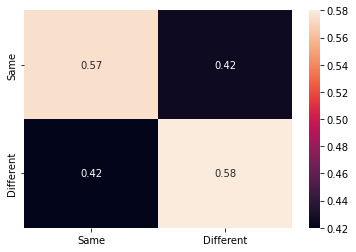

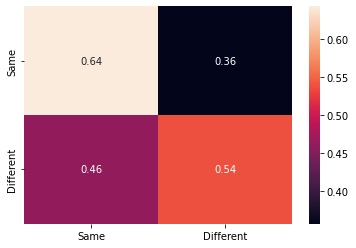

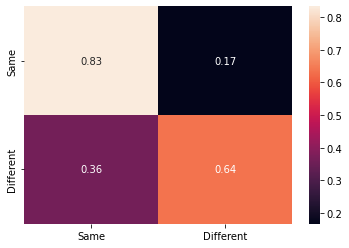

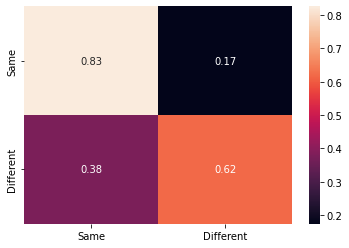

In [ ]:
test_for_3points_left_trained('resnet_v2_152', 300, 300)

Random model performance on 3 points left: 
Random model performance on 3 points right: 
Left trained model performance on 3 points left: 
Left trained model performance on 3 points right: 


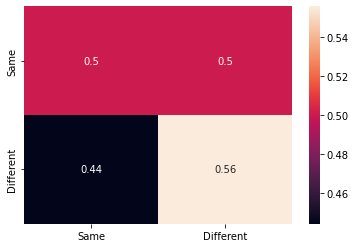

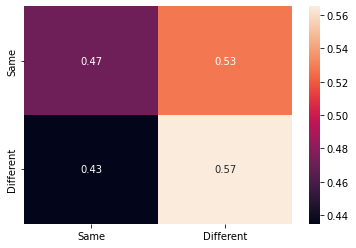

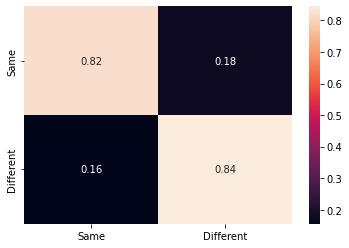

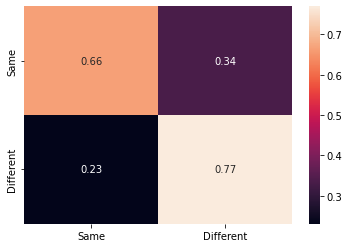

In [ ]:
def test_for_3points_left_trained_pt(model_name, n, rn, rad=2):
  model_handle = model_handle_map[model_name]
  image_size = model_image_size_map[model_name]
  w = h = image_size

  limgs = []
  llabels = []
  lclasses = []
  
  for i in range(n):
    img = Image.new("RGB", (w, h))
    img1 = ImageDraw.Draw(img)
    # point 1
    p1h = np.random.randint(0, h//2)
    p1w = np.random.randint(0, w)
    img1.ellipse([(p1w - rad, p1h - rad), (p1w + rad, p1h + rad)],
        fill='white'
    )

    # point 2
    if np.random.randint(0, 2)==0: # same
      p2h = h//2
      p2w = p1w
      llabels.append('same')
      lclasses.append(0)
    else: # different
      p2h = h//2
      p2w = np.random.randint(int(p1w - 0.1*w), p1w-2)
      llabels.append('different')
      lclasses.append(1)
    img1.ellipse(
        [(p2w - rad, p2h - rad), (p2w + rad, p2h + rad)],
        fill='white'
    )

    # point 3
    p3h = np.random.randint(h//2, h - rad)
    p3w = p1w
    img1.ellipse(
        [(p3w - rad, p3h - rad), (p3w + rad, p3h + rad)],
        fill='white'
    )

    img = np.asarray(img)
    img = tf.convert_to_tensor(img, dtype=tf.float32)
    img = img/255.0
    limgs.append(img)
  
  limgs = np.array(limgs)
  lclasses = np.array(lclasses)
  trainx, testx, trainy, testy = model_selection.train_test_split(
      limgs, lclasses, test_size = 0.3
  )

  rimgs = []
  rlabels = []
  rclasses = []
  
  for i in range(rn):
    img = Image.new("RGB", (w, h))
    img1 = ImageDraw.Draw(img)
    # point 1
    p1h = np.random.randint(0, h//2)
    p1w = np.random.randint(0, w)
    img1.ellipse([(p1w - rad, p1h - rad), (p1w + rad, p1h + rad)],
        fill='white'
    )

    # point 2
    if np.random.randint(0, 2)==0: # same
      p2h = h//2
      p2w = p1w
      rlabels.append('same')
      rclasses.append(0)
    else: # different
      p2h = h//2
      p2w = np.random.randint(p1w+2, int(p1w + 0.1*w))
      rlabels.append('different')
      rclasses.append(1)
    img1.ellipse(
        [(p2w - rad, p2h - rad), (p2w + rad, p2h + rad)],
        fill='white'
    )

    # point 3
    p3h = np.random.randint(h//2, h - rad)
    p3w = p1w
    img1.ellipse(
        [(p3w - rad, p3h - rad), (p3w + rad, p3h + rad)],
        fill='white'
    )

    img = np.asarray(img)
    img = tf.convert_to_tensor(img, dtype=tf.float32)
    img = img/255.0
    rimgs.append(img)
  
  rimgs = np.array(rimgs)
  rclasses = np.array(rclasses)

  num_classes = 2
  classifier = keras.Sequential([
                               hub.KerasLayer(model_handle, trainable=False),
                               keras.layers.Dense(num_classes, activation='softmax')
                              ])
  classifier.compile(
      optimizer = keras.optimizers.Adam(),
      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
      metrics=['acc']
  )

  plt.figure()
  print(f"Random model performance on 3 points left: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(testx), axis=1), testy, normalize='true'),
          index=['Same', 'Different'],
          columns=['Same', 'Different']
      ), annot=True)

  plt.figure()
  print(f"Random model performance on 3 points right: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(rimgs), axis=1), rclasses, normalize='true'),
          index=['Same', 'Different'],
          columns=['Same', 'Different']
      ), annot=True)
  
  classifier.fit(
      trainx, trainy, epochs=10, verbose = 0
  )

  plt.figure()
  print(f"Left trained model performance on 3 points left: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(testx), axis=1), testy, normalize='true'),
          index=['Same', 'Different'],
          columns=['Same', 'Different']
      ), annot=True)

  plt.figure()
  print(f"Left trained model performance on 3 points right: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(rimgs), axis=1), rclasses, normalize='true'),
          index=['Same', 'Different'],
          columns=['Same', 'Different']
      ), annot=True)

test_for_3points_left_trained_pt('resnet_v2_152', 300, 300)

Random model performance on 3 points left: 
Random model performance on 3 points right: 
Right trained model performance on 3 points left: 
Right trained model performance on 3 points right: 


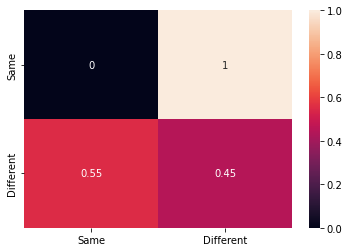

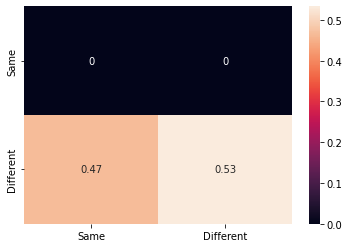

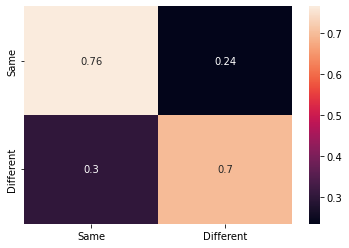

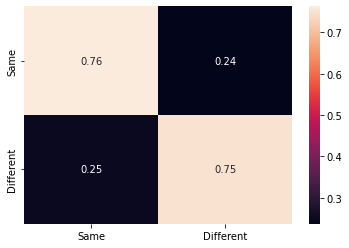

In [ ]:
def test_for_3points_right_trained(model_name, n, rn, rad=2):
  model_handle = model_handle_map[model_name]
  image_size = model_image_size_map[model_name]
  w = h = image_size

  limgs = []
  llabels = []
  lclasses = []
  
  for i in range(n):
    img = Image.new("RGB", (w, h))
    img1 = ImageDraw.Draw(img)
    # point 1
    p1h = np.random.randint(0, h//2)
    p1w = np.random.randint(0, w)
    img1.ellipse([(p1w - rad, p1h - rad), (p1w + rad, p1h + rad)],
        fill='white'
    )

    # point 2
    if np.random.randint(0, 2)==0: # same
      p2h = h//2
      p2w = p1w
      llabels.append('same')
      lclasses.append(0)
    else: # different
      p2h = h//2
      p2w = np.random.randint(int(p1w - 0.1*w), p1w-2)
      llabels.append('different')
      lclasses.append(1)
    img1.ellipse(
        [(p2w - rad, p2h - rad), (p2w + rad, p2h + rad)],
        fill='white'
    )

    # point 3
    p3h = np.random.randint(h//2, h - rad)
    p3w = p1w
    img1.ellipse(
        [(p3w - rad, p3h - rad), (p3w + rad, p3h + rad)],
        fill='white'
    )

    img = np.asarray(img)
    img = tf.convert_to_tensor(img, dtype=tf.float32)
    img = img/255.0
    limgs.append(img)
  
  limgs = np.array(limgs)
  lclasses = np.array(lclasses)

  rimgs = []
  rlabels = []
  rclasses = []
  
  for i in range(rn):
    img = Image.new("RGB", (w, h))
    img1 = ImageDraw.Draw(img)
    # point 1
    p1h = np.random.randint(0, h//2)
    p1w = np.random.randint(0, w)
    img1.ellipse([(p1w - rad, p1h - rad), (p1w + rad, p1h + rad)],
        fill='white'
    )

    # point 2
    if np.random.randint(0, 2)==0: # same
      p2h = h//2
      p2w = p1w
      rlabels.append('same')
      rclasses.append(0)
    else: # different
      p2h = h//2
      p2w = np.random.randint(p1w+2, int(p1w + 0.1*w))
      rlabels.append('different')
      rclasses.append(1)
    img1.ellipse(
        [(p2w - rad, p2h - rad), (p2w + rad, p2h + rad)],
        fill='white'
    )

    # point 3
    p3h = np.random.randint(h//2, h - rad)
    p3w = p1w
    img1.ellipse(
        [(p3w - rad, p3h - rad), (p3w + rad, p3h + rad)],
        fill='white'
    )

    img = np.asarray(img)
    img = tf.convert_to_tensor(img, dtype=tf.float32)
    img = img/255.0
    rimgs.append(img)
  
  rimgs = np.array(rimgs)
  rclasses = np.array(rclasses)
  trainx, testx, trainy, testy = model_selection.train_test_split(
      rimgs, rclasses, test_size = 0.3
  )

  num_classes = 2
  classifier = keras.Sequential([
                               hub.KerasLayer(model_handle),
                               keras.layers.Dense(num_classes, activation='softmax')
                              ])
  classifier.compile(
      optimizer = keras.optimizers.Adam(),
      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
      metrics=['acc']
  )

  plt.figure()
  print(f"Random model performance on 3 points left: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(limgs), axis=1), lclasses, normalize='true'),
          index=['Same', 'Different'],
          columns=['Same', 'Different']
      ), annot=True)

  plt.figure()
  print(f"Random model performance on 3 points right: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(testx), axis=1), testy, normalize='true'),
          index=['Same', 'Different'],
          columns=['Same', 'Different']
  ), annot=True)
  
  classifier.fit(
      trainx, trainy, epochs=10, verbose = 0
  )

  plt.figure()
  print(f"Right trained model performance on 3 points left: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(limgs), axis=1), lclasses, normalize='true'),
          index=['Same', 'Different'],
          columns=['Same', 'Different']
  ), annot=True)

  plt.figure()
  print(f"Right trained model performance on 3 points right: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(testx), axis=1), testy, normalize='true'),
          index=['Same', 'Different'],
          columns=['Same', 'Different']
  ), annot=True)

test_for_3points_right_trained('resnet_v2_152', 300, 300)

Random model performance on 3 points left: 
Random model performance on 3 points right: 
Right trained model performance on 3 points left: 
Right trained model performance on 3 points right: 


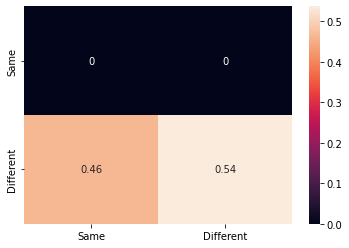

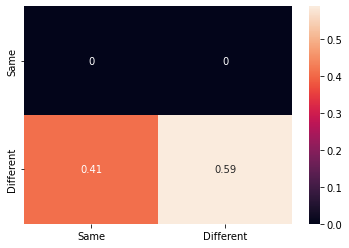

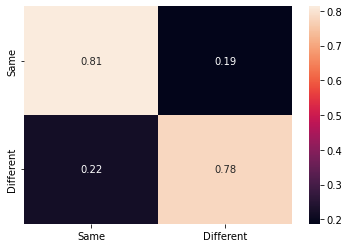

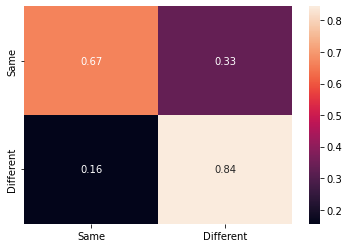

In [ ]:
def test_for_3points_right_trained_pt(model_name, n, rn, rad=2):
  model_handle = model_handle_map[model_name]
  image_size = model_image_size_map[model_name]
  w = h = image_size

  limgs = []
  llabels = []
  lclasses = []
  
  for i in range(n):
    img = Image.new("RGB", (w, h))
    img1 = ImageDraw.Draw(img)
    # point 1
    p1h = np.random.randint(0, h//2)
    p1w = np.random.randint(0, w)
    img1.ellipse([(p1w - rad, p1h - rad), (p1w + rad, p1h + rad)],
        fill='white'
    )

    # point 2
    if np.random.randint(0, 2)==0: # same
      p2h = h//2
      p2w = p1w
      llabels.append('same')
      lclasses.append(0)
    else: # different
      p2h = h//2
      p2w = np.random.randint(int(p1w - 0.1*w), p1w-2)
      llabels.append('different')
      lclasses.append(1)
    img1.ellipse(
        [(p2w - rad, p2h - rad), (p2w + rad, p2h + rad)],
        fill='white'
    )

    # point 3
    p3h = np.random.randint(h//2, h - rad)
    p3w = p1w
    img1.ellipse(
        [(p3w - rad, p3h - rad), (p3w + rad, p3h + rad)],
        fill='white'
    )

    img = np.asarray(img)
    img = tf.convert_to_tensor(img, dtype=tf.float32)
    img = img/255.0
    limgs.append(img)
  
  limgs = np.array(limgs)
  lclasses = np.array(lclasses)

  rimgs = []
  rlabels = []
  rclasses = []
  
  for i in range(rn):
    img = Image.new("RGB", (w, h))
    img1 = ImageDraw.Draw(img)
    # point 1
    p1h = np.random.randint(0, h//2)
    p1w = np.random.randint(0, w)
    img1.ellipse([(p1w - rad, p1h - rad), (p1w + rad, p1h + rad)],
        fill='white'
    )

    # point 2
    if np.random.randint(0, 2)==0: # same
      p2h = h//2
      p2w = p1w
      rlabels.append('same')
      rclasses.append(0)
    else: # different
      p2h = h//2
      p2w = np.random.randint(p1w+2, int(p1w + 0.1*w))
      rlabels.append('different')
      rclasses.append(1)
    img1.ellipse(
        [(p2w - rad, p2h - rad), (p2w + rad, p2h + rad)],
        fill='white'
    )

    # point 3
    p3h = np.random.randint(h//2, h - rad)
    p3w = p1w
    img1.ellipse(
        [(p3w - rad, p3h - rad), (p3w + rad, p3h + rad)],
        fill='white'
    )

    img = np.asarray(img)
    img = tf.convert_to_tensor(img, dtype=tf.float32)
    img = img/255.0
    rimgs.append(img)
  
  rimgs = np.array(rimgs)
  rclasses = np.array(rclasses)
  trainx, testx, trainy, testy = model_selection.train_test_split(
      rimgs, rclasses, test_size = 0.3
  )

  num_classes = 2
  classifier = keras.Sequential([
                               hub.KerasLayer(model_handle, trainable=False),
                               keras.layers.Dense(num_classes, activation='softmax')
                              ])
  classifier.compile(
      optimizer = keras.optimizers.Adam(),
      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
      metrics=['acc']
  )

  plt.figure()
  print(f"Random model performance on 3 points left: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(limgs), axis=1), lclasses, normalize='true'),
          index=['Same', 'Different'],
          columns=['Same', 'Different']
      ), annot=True)

  plt.figure()
  print(f"Random model performance on 3 points right: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(testx), axis=1), testy, normalize='true'),
          index=['Same', 'Different'],
          columns=['Same', 'Different']
  ), annot=True)
  
  classifier.fit(
      trainx, trainy, epochs=10, verbose = 0
  )

  plt.figure()
  print(f"Right trained model performance on 3 points left: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(limgs), axis=1), lclasses, normalize='true'),
          index=['Same', 'Different'],
          columns=['Same', 'Different']
  ), annot=True)

  plt.figure()
  print(f"Right trained model performance on 3 points right: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(testx), axis=1), testy, normalize='true'),
          index=['Same', 'Different'],
          columns=['Same', 'Different']
  ), annot=True)

test_for_3points_right_trained_pt('resnet_v2_152', 300, 300)

# Experiment 5

Random model performance on 3 point bisection: 
Trained model performance on 3 point bisection: 


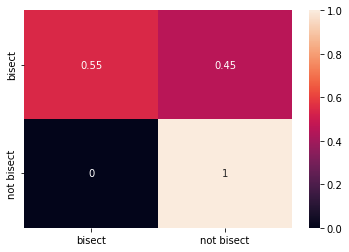

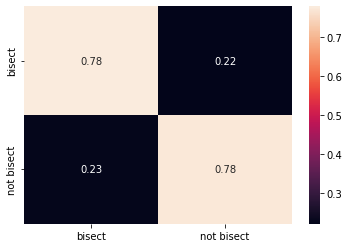

In [ ]:
def test_bisection(model_name, n, rad=2):
  model_handle = model_handle_map[model_name]
  image_size = model_image_size_map[model_name]
  w = h = image_size

  imgs = []
  labels = []
  classes = []
  for i in range(n):
    img = Image.new("RGB", (w, h))
    img1 = ImageDraw.Draw(img)

    # point 1
    p1h = np.random.randint(0, h//2)
    p1w = np.random.randint(0, w)
    img1.ellipse([(p1w - rad, p1h - rad), (p1w + rad, p1h + rad)],
        fill='white'
    )

    # point 3
    p3h = np.random.randint(h//2, h - rad)
    p3w = p1w
    img1.ellipse(
        [(p3w - rad, p3h - rad), (p3w + rad, p3h + rad)],
        fill='white'
    )

    # point 2
    if np.random.randint(0, 2)==0: # bisect
      p2h = (p1h + p3h)//2
      labels.append('bisect')
      classes.append(0)
    else: # not bisect
      p2h = np.random.randint(p1h, p3h)
      labels.append('not bisect')
      classes.append(1)

    p2w = p1w
    img1.ellipse(
        [(p2w - rad, p2h - rad), (p2w + rad, p2h + rad)],
        fill='white'
    )
    img = np.asarray(img)
    img = tf.convert_to_tensor(img, dtype=tf.float32)
    img = img/255.0
    imgs.append(img)
  
  imgs = np.array(imgs)
  classes = np.array(classes)
  trainx, testx, trainy, testy = model_selection.train_test_split(
      imgs, classes, test_size = 0.3
  )

  num_classes = 2
  classifier = keras.Sequential([
                               hub.KerasLayer(model_handle),
                               keras.layers.Dense(num_classes, activation='softmax')
                              ])
  classifier.compile(
      optimizer = keras.optimizers.Adam(),
      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
      metrics=['acc']
  )

  plt.figure()
  print(f"Random model performance on 3 point bisection: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(testx), axis=1), testy, normalize='true'),
          index=['bisect', 'not bisect'],
          columns=['bisect', 'not bisect']
      ), annot=True)

  classifier.fit(
      trainx, trainy, epochs=10, verbose = 0
  )

  plt.figure()
  print(f"Trained model performance on 3 point bisection: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(testx), axis=1), testy, normalize='true'),
          index=['bisect', 'not bisect'],
          columns=['bisect', 'not bisect']
      ), annot=True)

test_bisection('resnet_v2_152', 300)

Random model performance on 3 point bisection: 
Trained model performance on 3 point bisection: 


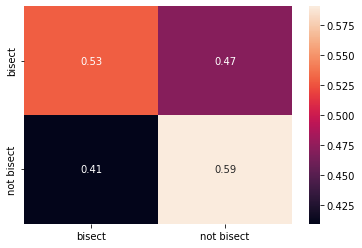

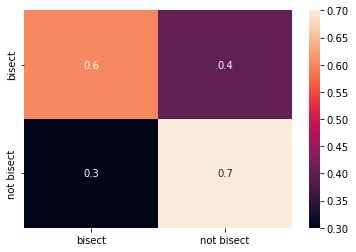

In [ ]:
def test_bisection_pt(model_name, n, rad=2):
  model_handle = model_handle_map[model_name]
  image_size = model_image_size_map[model_name]
  w = h = image_size

  imgs = []
  labels = []
  classes = []
  for i in range(n):
    img = Image.new("RGB", (w, h))
    img1 = ImageDraw.Draw(img)

    # point 1
    p1h = np.random.randint(0, h//2)
    p1w = np.random.randint(0, w)
    img1.ellipse([(p1w - rad, p1h - rad), (p1w + rad, p1h + rad)],
        fill='white'
    )

    # point 3
    p3h = np.random.randint(h//2, h - rad)
    p3w = p1w
    img1.ellipse(
        [(p3w - rad, p3h - rad), (p3w + rad, p3h + rad)],
        fill='white'
    )

    # point 2
    if np.random.randint(0, 2)==0: # bisect
      p2h = (p1h + p3h)//2
      labels.append('bisect')
      classes.append(0)
    else: # not bisect
      p2h = np.random.randint(p1h, p3h)
      labels.append('not bisect')
      classes.append(1)

    p2w = p1w
    img1.ellipse(
        [(p2w - rad, p2h - rad), (p2w + rad, p2h + rad)],
        fill='white'
    )
    img = np.asarray(img)
    img = tf.convert_to_tensor(img, dtype=tf.float32)
    img = img/255.0
    imgs.append(img)
  
  imgs = np.array(imgs)
  classes = np.array(classes)
  trainx, testx, trainy, testy = model_selection.train_test_split(
      imgs, classes, test_size = 0.3
  )

  num_classes = 2
  classifier = keras.Sequential([
                               hub.KerasLayer(model_handle, trainable=False),
                               keras.layers.Dense(num_classes, activation='softmax')
                              ])
  classifier.compile(
      optimizer = keras.optimizers.Adam(),
      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
      metrics=['acc']
  )

  plt.figure()
  print(f"Random model performance on 3 point bisection: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(testx), axis=1), testy, normalize='true'),
          index=['bisect', 'not bisect'],
          columns=['bisect', 'not bisect']
      ), annot=True)

  classifier.fit(
      trainx, trainy, epochs=10, verbose = 0
  )

  plt.figure()
  print(f"Trained model performance on 3 point bisection: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(testx), axis=1), testy, normalize='true'),
          index=['bisect', 'not bisect'],
          columns=['bisect', 'not bisect']
      ), annot=True)

test_bisection_pt('resnet_v2_152', 300)

# Experiment 6

Random model performance on 3 point bisection bottom: 
Random model performance on 3 point bisection top: 
Bottom Trained model performance on 3 point bisection bottom: 
Bottom Trained model performance on 3 point bisection top: 


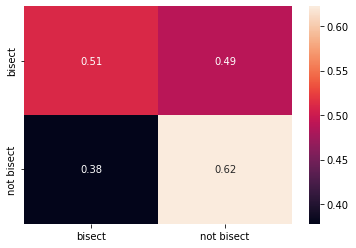

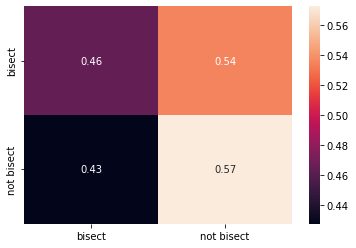

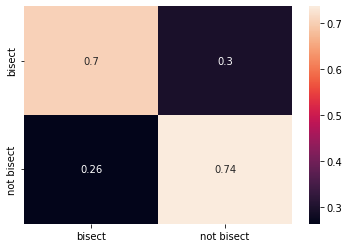

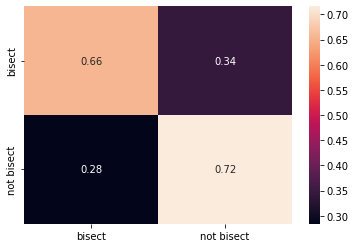

In [4]:
def test_bisection_bottom_train(model_name, n, tn, rad=2):
  model_handle = model_handle_map[model_name]
  image_size = model_image_size_map[model_name]
  w = h = image_size

  bimgs = []
  blabels = []
  bclasses = []
  for i in range(n):
    img = Image.new("RGB", (w, h))
    img1 = ImageDraw.Draw(img)

    # point 1
    p1h = np.random.randint(0, h//2)
    p1w = np.random.randint(0, w)
    img1.ellipse([(p1w - rad, p1h - rad), (p1w + rad, p1h + rad)],
        fill='white'
    )

    # point 3
    p3h = np.random.randint(h//2, h - rad)
    p3w = p1w
    img1.ellipse(
        [(p3w - rad, p3h - rad), (p3w + rad, p3h + rad)],
        fill='white'
    )

    # point 2
    if np.random.randint(0, 2)==0: # bisect
      p2h = (p1h + p3h)//2
      blabels.append('bisect')
      bclasses.append(0)
    else: # not bisect
      p2h = np.random.randint((p1h+p3h)//2, p3h)
      blabels.append('not bisect')
      bclasses.append(1)

    p2w = p1w
    img1.ellipse(
        [(p2w - rad, p2h - rad), (p2w + rad, p2h + rad)],
        fill='white'
    )
    img = np.asarray(img)
    img = tf.convert_to_tensor(img, dtype=tf.float32)
    img = img/255.0
    bimgs.append(img)
  
  bimgs = np.array(bimgs)
  bclasses = np.array(bclasses)
  trainx, testx, trainy, testy = model_selection.train_test_split(
      bimgs, bclasses, test_size = 0.3
  )

  num_classes = 2
  classifier = keras.Sequential([
                               hub.KerasLayer(model_handle),
                               keras.layers.Dense(num_classes, activation='softmax')
                              ])
  classifier.compile(
      optimizer = keras.optimizers.Adam(),
      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
      metrics=['acc']
  )

  timgs = []
  tlabels = []
  tclasses = []
  for i in range(tn):
    img = Image.new("RGB", (w, h))
    img1 = ImageDraw.Draw(img)

    # point 1
    p1h = np.random.randint(0, h//2)
    p1w = np.random.randint(0, w)
    img1.ellipse([(p1w - rad, p1h - rad), (p1w + rad, p1h + rad)],
        fill='white'
    )

    # point 3
    p3h = np.random.randint(h//2, h - rad)
    p3w = p1w
    img1.ellipse(
        [(p3w - rad, p3h - rad), (p3w + rad, p3h + rad)],
        fill='white'
    )

    # point 2
    if np.random.randint(0, 2)==0: # bisect
      p2h = (p1h + p3h)//2
      tlabels.append('bisect')
      tclasses.append(0)
    else: # not bisect
      p2h = np.random.randint(p1h, (p1h+p3h)//2)
      tlabels.append('not bisect')
      tclasses.append(1)

    p2w = p1w
    img1.ellipse(
        [(p2w - rad, p2h - rad), (p2w + rad, p2h + rad)],
        fill='white'
    )
    img = np.asarray(img)
    img = tf.convert_to_tensor(img, dtype=tf.float32)
    img = img/255.0
    timgs.append(img)
  
  timgs = np.array(timgs)
  tclasses = np.array(tclasses)

  plt.figure()
  print(f"Random model performance on 3 point bisection bottom: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(testx), axis=1), testy, normalize='true'),
          index=['bisect', 'not bisect'],
          columns=['bisect', 'not bisect']
  ), annot=True)
  plt.figure()
  print(f"Random model performance on 3 point bisection top: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(timgs), axis=1), tclasses, normalize='true'),
          index=['bisect', 'not bisect'],
          columns=['bisect', 'not bisect']
  ), annot=True)

  classifier.fit(
      trainx, trainy, epochs=10, verbose = 0
  )

  plt.figure()
  print(f"Bottom Trained model performance on 3 point bisection bottom: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(testx), axis=1), testy, normalize='true'),
          index=['bisect', 'not bisect'],
          columns=['bisect', 'not bisect']
  ), annot=True)
  plt.figure()
  print(f"Bottom Trained model performance on 3 point bisection top: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(timgs), axis=1), tclasses, normalize='true'),
          index=['bisect', 'not bisect'],
          columns=['bisect', 'not bisect']
  ), annot=True)

test_bisection_bottom_train('resnet_v2_152', 300, 300)

Random model performance on 3 point bisection bottom: 
Random model performance on 3 point bisection top: 
Bottom Trained model performance on 3 point bisection bottom: 
Bottom Trained model performance on 3 point bisection top: 


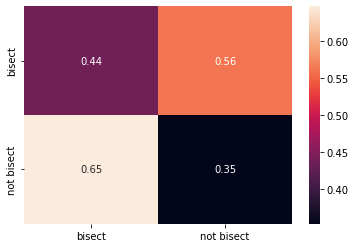

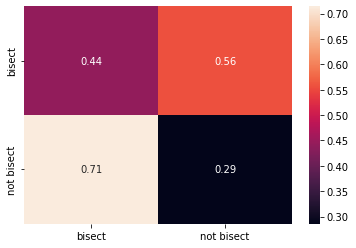

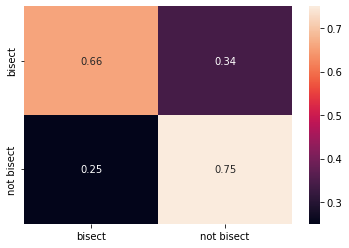

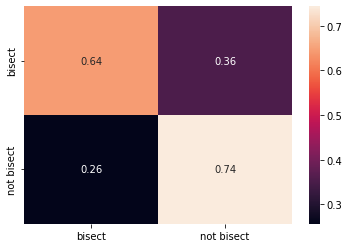

In [3]:
def test_bisection_bottom_train_pt(model_name, n, tn, rad=2):
  model_handle = model_handle_map[model_name]
  image_size = model_image_size_map[model_name]
  w = h = image_size

  bimgs = []
  blabels = []
  bclasses = []
  for i in range(n):
    img = Image.new("RGB", (w, h))
    img1 = ImageDraw.Draw(img)

    # point 1
    p1h = np.random.randint(0, h//2)
    p1w = np.random.randint(0, w)
    img1.ellipse([(p1w - rad, p1h - rad), (p1w + rad, p1h + rad)],
        fill='white'
    )

    # point 3
    p3h = np.random.randint(h//2, h - rad)
    p3w = p1w
    img1.ellipse(
        [(p3w - rad, p3h - rad), (p3w + rad, p3h + rad)],
        fill='white'
    )

    # point 2
    if np.random.randint(0, 2)==0: # bisect
      p2h = (p1h + p3h)//2
      blabels.append('bisect')
      bclasses.append(0)
    else: # not bisect
      p2h = np.random.randint((p1h+p3h)//2, p3h)
      blabels.append('not bisect')
      bclasses.append(1)

    p2w = p1w
    img1.ellipse(
        [(p2w - rad, p2h - rad), (p2w + rad, p2h + rad)],
        fill='white'
    )
    img = np.asarray(img)
    img = tf.convert_to_tensor(img, dtype=tf.float32)
    img = img/255.0
    bimgs.append(img)
  
  bimgs = np.array(bimgs)
  bclasses = np.array(bclasses)
  trainx, testx, trainy, testy = model_selection.train_test_split(
      bimgs, bclasses, test_size = 0.3
  )

  num_classes = 2
  classifier = keras.Sequential([
                               hub.KerasLayer(model_handle, trainable=False),
                               keras.layers.Dense(num_classes, activation='softmax')
                              ])
  classifier.compile(
      optimizer = keras.optimizers.Adam(),
      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
      metrics=['acc']
  )

  timgs = []
  tlabels = []
  tclasses = []
  for i in range(tn):
    img = Image.new("RGB", (w, h))
    img1 = ImageDraw.Draw(img)

    # point 1
    p1h = np.random.randint(0, h//2)
    p1w = np.random.randint(0, w)
    img1.ellipse([(p1w - rad, p1h - rad), (p1w + rad, p1h + rad)],
        fill='white'
    )

    # point 3
    p3h = np.random.randint(h//2, h - rad)
    p3w = p1w
    img1.ellipse(
        [(p3w - rad, p3h - rad), (p3w + rad, p3h + rad)],
        fill='white'
    )

    # point 2
    if np.random.randint(0, 2)==0: # bisect
      p2h = (p1h + p3h)//2
      tlabels.append('bisect')
      tclasses.append(0)
    else: # not bisect
      p2h = np.random.randint(p1h, (p1h+p3h)//2)
      tlabels.append('not bisect')
      tclasses.append(1)

    p2w = p1w
    img1.ellipse(
        [(p2w - rad, p2h - rad), (p2w + rad, p2h + rad)],
        fill='white'
    )
    img = np.asarray(img)
    img = tf.convert_to_tensor(img, dtype=tf.float32)
    img = img/255.0
    timgs.append(img)
  
  timgs = np.array(timgs)
  tclasses = np.array(tclasses)

  plt.figure()
  print(f"Random model performance on 3 point bisection bottom: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(testx), axis=1), testy, normalize='true'),
          index=['bisect', 'not bisect'],
          columns=['bisect', 'not bisect']
  ), annot=True)
  plt.figure()
  print(f"Random model performance on 3 point bisection top: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(timgs), axis=1), tclasses, normalize='true'),
          index=['bisect', 'not bisect'],
          columns=['bisect', 'not bisect']
  ), annot=True)

  classifier.fit(
      trainx, trainy, epochs=10, verbose = 0
  )

  plt.figure()
  print(f"Bottom Trained model performance on 3 point bisection bottom: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(testx), axis=1), testy, normalize='true'),
          index=['bisect', 'not bisect'],
          columns=['bisect', 'not bisect']
  ), annot=True)
  plt.figure()
  print(f"Bottom Trained model performance on 3 point bisection top: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(timgs), axis=1), tclasses, normalize='true'),
          index=['bisect', 'not bisect'],
          columns=['bisect', 'not bisect']
  ), annot=True)

test_bisection_bottom_train_pt('resnet_v2_152', 300, 300)

Random model performance on 3 point bisection bottom: 
Random model performance on 3 point bisection top: 
Top Trained model performance on 3 point bisection bottom: 
Top Trained model performance on 3 point bisection top: 


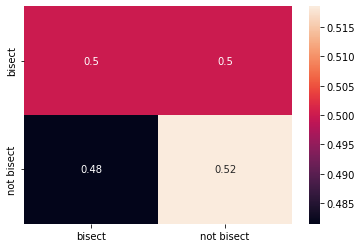

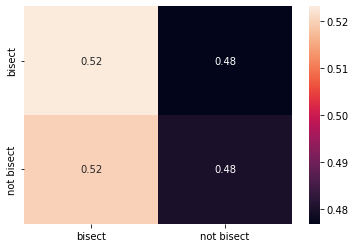

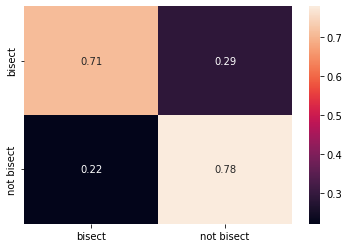

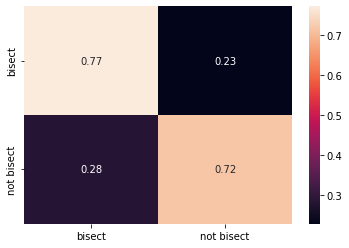

In [6]:
def test_bisection_top_train(model_name, n, tn, rad=2):
  model_handle = model_handle_map[model_name]
  image_size = model_image_size_map[model_name]
  w = h = image_size

  bimgs = []
  blabels = []
  bclasses = []
  for i in range(n):
    img = Image.new("RGB", (w, h))
    img1 = ImageDraw.Draw(img)

    # point 1
    p1h = np.random.randint(0, h//2)
    p1w = np.random.randint(0, w)
    img1.ellipse([(p1w - rad, p1h - rad), (p1w + rad, p1h + rad)],
        fill='white'
    )

    # point 3
    p3h = np.random.randint(h//2, h - rad)
    p3w = p1w
    img1.ellipse(
        [(p3w - rad, p3h - rad), (p3w + rad, p3h + rad)],
        fill='white'
    )

    # point 2
    if np.random.randint(0, 2)==0: # bisect
      p2h = (p1h + p3h)//2
      blabels.append('bisect')
      bclasses.append(0)
    else: # not bisect
      p2h = np.random.randint((p1h+p3h)//2, p3h)
      blabels.append('not bisect')
      bclasses.append(1)

    p2w = p1w
    img1.ellipse(
        [(p2w - rad, p2h - rad), (p2w + rad, p2h + rad)],
        fill='white'
    )
    img = np.asarray(img)
    img = tf.convert_to_tensor(img, dtype=tf.float32)
    img = img/255.0
    bimgs.append(img)
  
  bimgs = np.array(bimgs)
  bclasses = np.array(bclasses)

  timgs = []
  tlabels = []
  tclasses = []
  for i in range(tn):
    img = Image.new("RGB", (w, h))
    img1 = ImageDraw.Draw(img)

    # point 1
    p1h = np.random.randint(0, h//2)
    p1w = np.random.randint(0, w)
    img1.ellipse([(p1w - rad, p1h - rad), (p1w + rad, p1h + rad)],
        fill='white'
    )

    # point 3
    p3h = np.random.randint(h//2, h - rad)
    p3w = p1w
    img1.ellipse(
        [(p3w - rad, p3h - rad), (p3w + rad, p3h + rad)],
        fill='white'
    )

    # point 2
    if np.random.randint(0, 2)==0: # bisect
      p2h = (p1h + p3h)//2
      tlabels.append('bisect')
      tclasses.append(0)
    else: # not bisect
      p2h = np.random.randint(p1h, (p1h+p3h)//2)
      tlabels.append('not bisect')
      tclasses.append(1)

    p2w = p1w
    img1.ellipse(
        [(p2w - rad, p2h - rad), (p2w + rad, p2h + rad)],
        fill='white'
    )
    img = np.asarray(img)
    img = tf.convert_to_tensor(img, dtype=tf.float32)
    img = img/255.0
    timgs.append(img)
  
  timgs = np.array(timgs)
  tclasses = np.array(tclasses)
  trainx, testx, trainy, testy = model_selection.train_test_split(
      timgs, tclasses, test_size = 0.3
  )

  num_classes = 2
  classifier = keras.Sequential([
                               hub.KerasLayer(model_handle),
                               keras.layers.Dense(num_classes, activation='softmax')
                              ])
  classifier.compile(
      optimizer = keras.optimizers.Adam(),
      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
      metrics=['acc']
  )

  plt.figure()
  print(f"Random model performance on 3 point bisection bottom: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(bimgs), axis=1), bclasses, normalize='true'),
          index=['bisect', 'not bisect'],
          columns=['bisect', 'not bisect']
  ), annot=True)
  plt.figure()
  print(f"Random model performance on 3 point bisection top: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(testx), axis=1), testy, normalize='true'),
          index=['bisect', 'not bisect'],
          columns=['bisect', 'not bisect']
  ), annot=True)

  classifier.fit(
      trainx, trainy, epochs=10, verbose = 0
  )

  plt.figure()
  print(f"Top Trained model performance on 3 point bisection bottom: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(bimgs), axis=1), bclasses, normalize='true'),
          index=['bisect', 'not bisect'],
          columns=['bisect', 'not bisect']
  ), annot=True)
  plt.figure()
  print(f"Top Trained model performance on 3 point bisection top: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(testx), axis=1), testy, normalize='true'),
          index=['bisect', 'not bisect'],
          columns=['bisect', 'not bisect']
  ), annot=True)

test_bisection_top_train('resnet_v2_152', 300, 300)

Random model performance on 3 point bisection bottom: 
Random model performance on 3 point bisection top: 
Top Trained model performance on 3 point bisection bottom: 
Top Trained model performance on 3 point bisection top: 


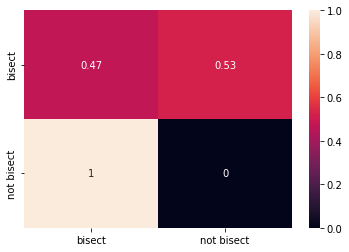

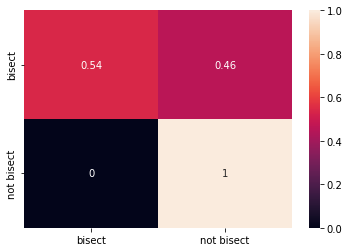

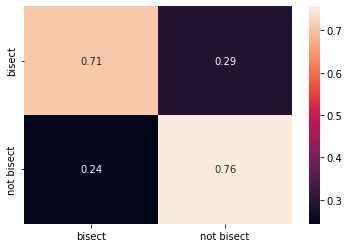

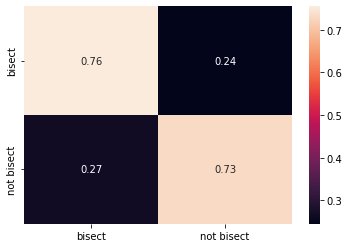

In [5]:
def test_bisection_top_train_pt(model_name, n, tn, rad=2):
  model_handle = model_handle_map[model_name]
  image_size = model_image_size_map[model_name]
  w = h = image_size

  bimgs = []
  blabels = []
  bclasses = []
  for i in range(n):
    img = Image.new("RGB", (w, h))
    img1 = ImageDraw.Draw(img)

    # point 1
    p1h = np.random.randint(0, h//2)
    p1w = np.random.randint(0, w)
    img1.ellipse([(p1w - rad, p1h - rad), (p1w + rad, p1h + rad)],
        fill='white'
    )

    # point 3
    p3h = np.random.randint(h//2, h - rad)
    p3w = p1w
    img1.ellipse(
        [(p3w - rad, p3h - rad), (p3w + rad, p3h + rad)],
        fill='white'
    )

    # point 2
    if np.random.randint(0, 2)==0: # bisect
      p2h = (p1h + p3h)//2
      blabels.append('bisect')
      bclasses.append(0)
    else: # not bisect
      p2h = np.random.randint((p1h+p3h)//2, p3h)
      blabels.append('not bisect')
      bclasses.append(1)

    p2w = p1w
    img1.ellipse(
        [(p2w - rad, p2h - rad), (p2w + rad, p2h + rad)],
        fill='white'
    )
    img = np.asarray(img)
    img = tf.convert_to_tensor(img, dtype=tf.float32)
    img = img/255.0
    bimgs.append(img)
  
  bimgs = np.array(bimgs)
  bclasses = np.array(bclasses)

  timgs = []
  tlabels = []
  tclasses = []
  for i in range(tn):
    img = Image.new("RGB", (w, h))
    img1 = ImageDraw.Draw(img)

    # point 1
    p1h = np.random.randint(0, h//2)
    p1w = np.random.randint(0, w)
    img1.ellipse([(p1w - rad, p1h - rad), (p1w + rad, p1h + rad)],
        fill='white'
    )

    # point 3
    p3h = np.random.randint(h//2, h - rad)
    p3w = p1w
    img1.ellipse(
        [(p3w - rad, p3h - rad), (p3w + rad, p3h + rad)],
        fill='white'
    )

    # point 2
    if np.random.randint(0, 2)==0: # bisect
      p2h = (p1h + p3h)//2
      tlabels.append('bisect')
      tclasses.append(0)
    else: # not bisect
      p2h = np.random.randint(p1h, (p1h+p3h)//2)
      tlabels.append('not bisect')
      tclasses.append(1)

    p2w = p1w
    img1.ellipse(
        [(p2w - rad, p2h - rad), (p2w + rad, p2h + rad)],
        fill='white'
    )
    img = np.asarray(img)
    img = tf.convert_to_tensor(img, dtype=tf.float32)
    img = img/255.0
    timgs.append(img)
  
  timgs = np.array(timgs)
  tclasses = np.array(tclasses)
  trainx, testx, trainy, testy = model_selection.train_test_split(
      timgs, tclasses, test_size = 0.3
  )

  num_classes = 2
  classifier = keras.Sequential([
                               hub.KerasLayer(model_handle, trainable=False),
                               keras.layers.Dense(num_classes, activation='softmax')
                              ])
  classifier.compile(
      optimizer = keras.optimizers.Adam(),
      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
      metrics=['acc']
  )

  plt.figure()
  print(f"Random model performance on 3 point bisection bottom: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(bimgs), axis=1), bclasses, normalize='true'),
          index=['bisect', 'not bisect'],
          columns=['bisect', 'not bisect']
  ), annot=True)
  plt.figure()
  print(f"Random model performance on 3 point bisection top: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(testx), axis=1), testy, normalize='true'),
          index=['bisect', 'not bisect'],
          columns=['bisect', 'not bisect']
  ), annot=True)

  classifier.fit(
      trainx, trainy, epochs=10, verbose = 0
  )

  plt.figure()
  print(f"Top Trained model performance on 3 point bisection bottom: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(bimgs), axis=1), bclasses, normalize='true'),
          index=['bisect', 'not bisect'],
          columns=['bisect', 'not bisect']
  ), annot=True)
  plt.figure()
  print(f"Top Trained model performance on 3 point bisection top: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(testx), axis=1), testy, normalize='true'),
          index=['bisect', 'not bisect'],
          columns=['bisect', 'not bisect']
  ), annot=True)

test_bisection_top_train_pt('resnet_v2_152', 300, 300)

# Experiment 7

In [7]:
%matplotlib inline
def test_interval(model_name, n):
  model_handle = model_handle_map[model_name]
  w = h = image_size = model_image_size_map[model_name]
  
  imgs = []
  labels = []
  classes = []

  for i in range(n):
    img = Image.new("RGB", (w, h))
    img1 = ImageDraw.Draw(img)

    ## above lines
    alw1 = np.random.randint(0, w//2)
    arw1 = alw1 + min(np.random.randint(int(0.1*w),  int(0.3*w)), w-1-alw1)
    alh1 = 0
    arh1 = 0
    alw2 = alw1
    arw2 = arw1
    alh2 = int(h//2 - h*0.1)
    arh2 = alh2
    img1.line([(alw1, alh1), (alw2, alh2)], fill='white', width = 0)
    img1.line([(arw1, arh1), (arw2, arh2)], fill='white', width = 0)

    ## below lines
    if np.random.randint(0, 2)==0: # interval same
      blw1 = alw1
      brw1 = arw1 
      blh1 = h - 1
      brh1 = h - 1
      blw2 = blw1
      brw2 = brw1
      blh2 = int(h//2 + h*0.1)
      brh2 = blh2
      labels.append('same')
      classes.append(0)
    else: #interval different
      labels.append('different')
      classes.append(1)
      if np.random.randint(0, 2)==0: # narrower
        blw1 = alw1 + np.random.randint(1, 10)
        brw1 = arw1 - np.random.randint(1, 10)
        blh1 = h - 1
        brh1 = h - 1
        blw2 = blw1
        brw2 = brw1
        blh2 = int(h//2 + h*0.1)
        brh2 = blh2
      else: # wider
        blw1 = alw1 - np.random.randint(1, 10)
        brw1 = arw1 + np.random.randint(1, 10)
        blh1 = h - 1
        brh1 = h - 1
        blw2 = blw1
        brw2 = brw1
        blh2 = int(h//2 + h*0.1)
        brh2 = blh2
    img1.line([(blw1, blh1), (blw2, blh2)], fill='white', width = 0)
    img1.line([(brw1, brh1), (brw2, brh2)], fill='white', width = 0)

    img = np.asarray(img)
    img = tf.convert_to_tensor(img, dtype=tf.float32)
    img = img/255.0
    #plt.imshow(img)
    #plt.show()
    imgs.append(img)
  
  #print(labels)
  imgs = np.array(imgs)
  classes = np.array(classes)
  trainx, testx, trainy, testy = model_selection.train_test_split(
      imgs, classes, test_size = 0.3
  )

  num_classes = 2
  classifier = keras.Sequential([
                               hub.KerasLayer(model_handle),
                               keras.layers.Dense(num_classes, activation='softmax')
                              ])
  classifier.compile(
      optimizer = keras.optimizers.Adam(),
      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
      metrics=['acc']
  )

  plt.figure()
  print(f"Random model performance for interval check: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(testx), axis=1), testy, normalize='true'),
          index=['Same', 'Different'],
          columns=['Same', 'Different']
  ), annot=True)  

  classifier.fit(
      trainx, trainy, epochs=10, verbose = 0
  )

  plt.figure()
  print(f"Trained model performance on interval check: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(testx), axis=1), testy, normalize='true'),
          index=['Same', 'Different'],
          columns=['Same', 'Different']
  ), annot=True)

#test_interval('efficientnetv2-s', 300)

Random model performance for interval check: 
Trained model performance on interval check: 


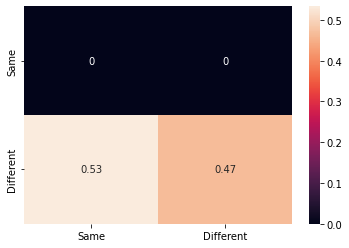

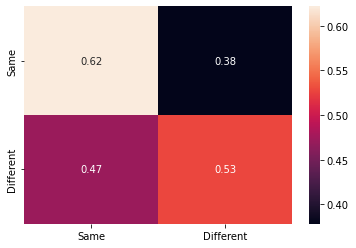

In [8]:
test_interval('resnet_v2_152', 300)

Random model performance for interval check: 
Trained model performance on interval check: 


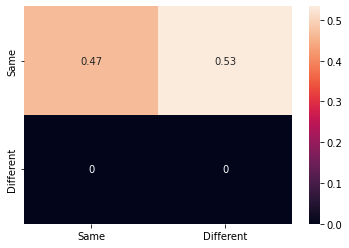

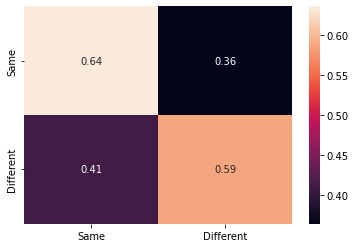

In [9]:
test_interval('inception_v3', 300)

Random model performance for interval check: 
Trained model performance on interval check: 


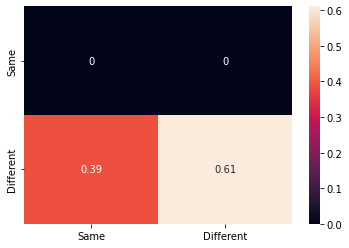

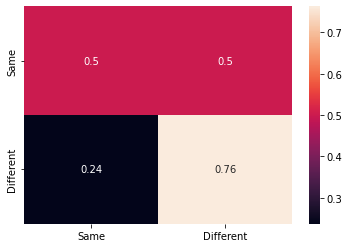

In [10]:
%matplotlib inline
def test_interval_pt(model_name, n):
  model_handle = model_handle_map[model_name]
  w = h = image_size = model_image_size_map[model_name]
  
  imgs = []
  labels = []
  classes = []

  for i in range(n):
    img = Image.new("RGB", (w, h))
    img1 = ImageDraw.Draw(img)

    ## above lines
    alw1 = np.random.randint(0, w//2)
    arw1 = alw1 + min(np.random.randint(int(0.1*w),  int(0.3*w)), w-1-alw1)
    alh1 = 0
    arh1 = 0
    alw2 = alw1
    arw2 = arw1
    alh2 = int(h//2 - h*0.1)
    arh2 = alh2
    img1.line([(alw1, alh1), (alw2, alh2)], fill='white', width = 0)
    img1.line([(arw1, arh1), (arw2, arh2)], fill='white', width = 0)

    ## below lines
    if np.random.randint(0, 2)==0: # interval same
      blw1 = alw1
      brw1 = arw1 
      blh1 = h - 1
      brh1 = h - 1
      blw2 = blw1
      brw2 = brw1
      blh2 = int(h//2 + h*0.1)
      brh2 = blh2
      labels.append('same')
      classes.append(0)
    else: #interval different
      labels.append('different')
      classes.append(1)
      if np.random.randint(0, 2)==0: # narrower
        blw1 = alw1 + np.random.randint(1, 10)
        brw1 = arw1 - np.random.randint(1, 10)
        blh1 = h - 1
        brh1 = h - 1
        blw2 = blw1
        brw2 = brw1
        blh2 = int(h//2 + h*0.1)
        brh2 = blh2
      else: # wider
        blw1 = alw1 - np.random.randint(1, 10)
        brw1 = arw1 + np.random.randint(1, 10)
        blh1 = h - 1
        brh1 = h - 1
        blw2 = blw1
        brw2 = brw1
        blh2 = int(h//2 + h*0.1)
        brh2 = blh2
    img1.line([(blw1, blh1), (blw2, blh2)], fill='white', width = 0)
    img1.line([(brw1, brh1), (brw2, brh2)], fill='white', width = 0)

    img = np.asarray(img)
    img = tf.convert_to_tensor(img, dtype=tf.float32)
    img = img/255.0
    #plt.imshow(img)
    #plt.show()
    imgs.append(img)
  
  #print(labels)
  imgs = np.array(imgs)
  classes = np.array(classes)
  trainx, testx, trainy, testy = model_selection.train_test_split(
      imgs, classes, test_size = 0.3
  )

  num_classes = 2
  classifier = keras.Sequential([
                               hub.KerasLayer(model_handle, trainable=False),
                               keras.layers.Dense(num_classes, activation='softmax')
                              ])
  classifier.compile(
      optimizer = keras.optimizers.Adam(),
      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
      metrics=['acc']
  )

  plt.figure()
  print(f"Random model performance for interval check: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(testx), axis=1), testy, normalize='true'),
          index=['Same', 'Different'],
          columns=['Same', 'Different']
  ), annot=True)  

  classifier.fit(
      trainx, trainy, epochs=10, verbose = 0
  )

  plt.figure()
  print(f"Trained model performance on interval check: ")
  sb.heatmap(
      pd.DataFrame(
          metrics.confusion_matrix(np.argmax(classifier.predict(testx), axis=1), testy, normalize='true'),
          index=['Same', 'Different'],
          columns=['Same', 'Different']
  ), annot=True)

test_interval_pt('inception_v3', 300)

# RBF model

----- Evaluation on Test Data -----
Accuracy Score:  0.7666666666666667
              precision    recall  f1-score   support

           0       0.76      1.00      0.87        45
           1       1.00      0.07      0.12        15

    accuracy                           0.77        60
   macro avg       0.88      0.53      0.50        60
weighted avg       0.82      0.77      0.68        60

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.8666666666666667
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       196
           1       1.00      0.27      0.43        44

    accuracy                           0.87       240
   macro avg       0.93      0.64      0.68       240
weighted avg       0.89      0.87      0.83       240

--------------------------------------------------------
----- Evaluation on Test Data -----
Accuracy Score:  0.7666666666666667
            

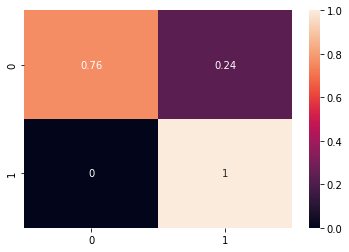

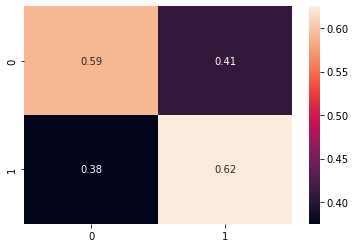

In [ ]:

import pandas as pd # for data manipulation
import numpy as np # for data manipulation

from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn.svm import SVC # for Support Vector Classification model


def fitting(X, y, C, gamma):
    # Create training and testing samples
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Fit the model
    # Note, available kernels: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
    model = SVC(kernel='rbf', probability=True, C=C, gamma=gamma)
    clf = model.fit(X_train, y_train)

    # Predict class labels on training data
    pred_labels_tr = model.predict(X_train)
    # Predict class labels on a test data
    pred_labels_te = model.predict(X_test)

    # Use score method to get accuracy of the model
    print('----- Evaluation on Test Data -----')
    score_te = model.score(X_test, y_test)
    print('Accuracy Score: ', score_te)
    # Look at classification report to evaluate the model
    print(classification_report(y_test, pred_labels_te))
    print('--------------------------------------------------------')

    print('----- Evaluation on Training Data -----')
    score_tr = model.score(X_train, y_train)
    print('Accuracy Score: ', score_tr)
    # Look at classification report to evaluate the model
    print(classification_report(y_train, pred_labels_tr))
    print('--------------------------------------------------------')
    
    # Return relevant data for chart plotting
    return X_train, X_test, y_train, y_test, clf

image_size = 100
numhorsamples = 300

fittings = []

for orientation in ["vertical", "horizontal"]:
  hdirname = "/content/drive/My Drive/Colab Notebooks/Cog Sci and AI/csai project/{}vernier".format(orientation)
  generate_random_verniers((image_size, image_size), orientation, hdirname, numhorsamples)
  with open(hdirname + "/labels.txt", 'r') as f:
    hlabels = f.readlines()
    hclasses = [l.strip() for l in hlabels]
    for i in range(len(hclasses)):
      hclasses[i] = 0 if hclasses[i]=='same' else 1
    hclasses = np.array(hclasses)
  num_classes = len(np.unique(hclasses))

  himgs = []
  himgfiles = glob.glob(hdirname+"/*.jpg")
  for imgfile in himgfiles:
    img = np.asarray(
        Image.open(imgfile)
    )
    img = img/255.0
    himgs.append(img.flatten())
  himgs = np.array(himgs)

  # Fit the model and display results
  fittings.append([fitting(himgs, hclasses, 1, 'scale')])
  X_train, X_test, y_train, y_test, clf = fitting(himgs, hclasses, 1, 'scale')
  plt.figure()
  sb.heatmap(metrics.confusion_matrix(clf.predict(X_test), y_test, normalize='true'), annot=True);

In [ ]:
for orientation in ["vertical", "horizontal"]:
  hdirname = "/content/drive/My Drive/Colab Notebooks/Cog Sci and AI/csai project/{}vernier".format(orientation)
  generate_random_verniers((image_size, image_size), orientation, hdirname, numhorsamples)
  with open(hdirname + "/labels.txt", 'r') as f:
    hlabels = f.readlines()
    hclasses = [l.strip() for l in hlabels]
    for i in range(len(hclasses)):
      hclasses[i] = 0 if hclasses[i]=='same' else 1
    hclasses = np.array(hclasses)
    unique, counts = np.unique(hclasses, return_counts=True)

    print(np.asarray((unique, counts)).T)

[[  0 231]
 [  1  69]]
[[  0 170]
 [  1 130]]


In [ ]:
def generate_curvature_vernier(shape, imname, curvature="left", color="white"):
    w, h = shape
    img = Image.new("RGB", (w, h))
    img1 = ImageDraw.Draw(img)

    delta = np.random.randint(50, 150)
    if curvature == "right":
      angle = np.random.randint(20, 31)
      img1.arc([delta, delta, w - delta, h - delta], -angle, angle, fill=None, width=0)
    else:
      angle = np.random.randint(20, 26)
      img1.arc([delta, delta, w - delta, h - delta], 135 + angle, 225 - angle, fill=None, width=0)

    return  np.asarray(img)


y_curve = []
X_curve = []
for _ in range(100):
  X_curve.append(generate_curvature_vernier([300, 300], "a").flatten())
  y_curve.append(0)
for _ in range(100):
  X_curve.append(generate_curvature_vernier([300, 300], "a", "right").flatten())
  y_curve.append(1)

c = list(zip(X_curve, y_curve))

np.random.shuffle(c)
X_curve, y_curve = zip(*c)
X_curve = np.array(X_curve)
y_curve = np.array(y_curve)

----- Evaluation on Test Data -----
Accuracy Score:  0.7
              precision    recall  f1-score   support

           0       0.70      0.70      0.70        20
           1       0.70      0.70      0.70        20

    accuracy                           0.70        40
   macro avg       0.70      0.70      0.70        40
weighted avg       0.70      0.70      0.70        40

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        80

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160

--------------------------------------------------------


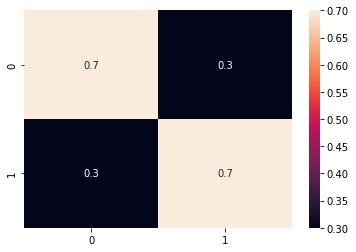

In [ ]:
X_train, X_test, y_train, y_test, clf = fitting(X_curve, y_curve, 1, 'scale')
plt.figure()
sb.heatmap(metrics.confusion_matrix(clf.predict(X_test), y_test, normalize='true'), annot=True);